In [2]:
#pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 17.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
from collections import Counter

In [4]:
file_path = "/home/carlos/Notebooks/Data/r_insomnia_posts.jsonl"

In [5]:
df = pd.read_json(file_path, lines=True)

In [6]:
df.head()

,all_awardings,allow_live_comments,archived,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,num_reports,removal_reason,report_reasons,saved,user_reports,visited,_meta,previous_selftext,selftext_html,media_metadata
0,[],False,False,OtherSquare7,1.587844e+09,None,NaN,[],NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],True,False,[deleted],NaN,,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,False,[deleted],NaN,,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,False,[deleted],NaN,,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,False,wdDrake,1.620885e+09,None,NaN,[],NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Seems there are a lot of columns with little or no information used on them so I will take them out to keep the set as simple/light as possible.

In [9]:
df.columns.tolist()

['all_awardings',
 'allow_live_comments',
 'archived',
 'author',
 'author_created_utc',
 'author_flair_background_color',
 'author_flair_css_class',
 'author_flair_richtext',
 'author_flair_template_id',
 'author_flair_text',
 'author_flair_text_color',
 'author_flair_type',
 'author_fullname',
 'author_patreon_flair',
 'author_premium',
 'awarders',
 'banned_by',
 'can_gild',
 'can_mod_post',
 'category',
 'content_categories',
 'contest_mode',
 'created_utc',
 'discussion_type',
 'distinguished',
 'domain',
 'edited',
 'gilded',
 'gildings',
 'hidden',
 'hide_score',
 'id',
 'is_created_from_ads_ui',
 'is_crosspostable',
 'is_meta',
 'is_original_content',
 'is_reddit_media_domain',
 'is_robot_indexable',
 'is_self',
 'is_video',
 'link_flair_background_color',
 'link_flair_css_class',
 'link_flair_richtext',
 'link_flair_text',
 'link_flair_text_color',
 'link_flair_type',
 'locked',
 'media',
 'media_embed',
 'media_only',
 'name',
 'no_follow',
 'num_comments',
 'num_crossposts',

In [15]:
to_remove = ['all_awardings',
 'allow_live_comments',
 'archived',
 'author_flair_background_color',
 'author_flair_css_class',
 'author_flair_richtext',
 'author_flair_template_id',
 'author_flair_text',
 'author_flair_text_color',
 'author_flair_type',
 'author_fullname',
 'author_patreon_flair',
 'author_premium',
 'awarders',
 'banned_by',
 'can_gild',
 'can_mod_post',
 'category',
 'content_categories',
 'contest_mode',
 'discussion_type',
 'distinguished',
 'domain',
 'edited',
 'gilded',
 'gildings',
 'hidden',
 'hide_score',
 'is_created_from_ads_ui',
 'is_crosspostable',
 'is_meta',
 'is_original_content',
 'is_reddit_media_domain',
 'is_robot_indexable',
 'is_video',
 'link_flair_background_color',
 'link_flair_css_class',
 'link_flair_richtext',
 'link_flair_text',
 'link_flair_text_color',
 'link_flair_type',
 'locked',
 'media',
 'media_embed',
 'media_only',
 'no_follow',
 'over_18',
 'parent_whitelist_status',
 'pinned',
 'pwls',
 'quarantine',
 'removed_by',
 'removed_by_category',
 'score',
 'secure_media',
 'secure_media_embed',
 'send_replies',
 'spoiler',
 'stickied',
 'subreddit',
 'subreddit_id',
 'subreddit_name_prefixed',
 'subreddit_subscribers',
 'subreddit_type',
 'suggested_sort',
 'thumbnail',
 'thumbnail_height',
 'thumbnail_width',
 'top_awarded_type',
 'total_awards_received',
 'treatment_tags',
 'upvote_ratio',
 'whitelist_status',
 'wls',
 'ups',
 'post_hint',
 'preview',
 'author_cakeday',
 'call_to_action',
 'link_flair_template_id',
 'url_overridden_by_dest',
 'approved_at_utc',
 'approved_by',
 'author_is_blocked',
 'banned_at_utc',
 'created',
 'downs',
 'likes',
 'mod_note',
 'mod_reason_by',
 'mod_reason_title',
 'mod_reports',
 'num_reports',
 'removal_reason',
 'report_reasons',
 'saved',
 'user_reports',
 'visited',
 '_meta',
 'previous_selftext',
 'selftext_html',
 'media_metadata', 'view_count', 'clicked']

In [16]:
df.drop(columns = to_remove, axis=1, inplace=True)

KeyError: "['all_awardings', 'allow_live_comments', 'archived', 'author_flair_background_color', 'author_flair_css_class', 'author_flair_richtext', 'author_flair_template_id', 'author_flair_text', 'author_flair_text_color', 'author_flair_type', 'author_fullname', 'author_patreon_flair', 'author_premium', 'awarders', 'banned_by', 'can_gild', 'can_mod_post', 'category', 'content_categories', 'contest_mode', 'discussion_type', 'distinguished', 'domain', 'edited', 'gilded', 'gildings', 'hidden', 'hide_score', 'is_created_from_ads_ui', 'is_crosspostable', 'is_meta', 'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable', 'is_video', 'link_flair_background_color', 'link_flair_css_class', 'link_flair_richtext', 'link_flair_text', 'link_flair_text_color', 'link_flair_type', 'locked', 'media', 'media_embed', 'media_only', 'no_follow', 'over_18', 'parent_whitelist_status', 'pinned', 'pwls', 'quarantine', 'removed_by', 'removed_by_category', 'score', 'secure_media', 'secure_media_embed', 'send_replies', 'spoiler', 'stickied', 'subreddit', 'subreddit_id', 'subreddit_name_prefixed', 'subreddit_subscribers', 'subreddit_type', 'suggested_sort', 'thumbnail', 'thumbnail_height', 'thumbnail_width', 'top_awarded_type', 'total_awards_received', 'treatment_tags', 'upvote_ratio', 'whitelist_status', 'wls', 'ups', 'post_hint', 'preview', 'author_cakeday', 'call_to_action', 'link_flair_template_id', 'url_overridden_by_dest', 'approved_at_utc', 'approved_by', 'author_is_blocked', 'banned_at_utc', 'created', 'downs', 'likes', 'mod_note', 'mod_reason_by', 'mod_reason_title', 'mod_reports', 'num_reports', 'removal_reason', 'report_reasons', 'saved', 'user_reports', 'visited', '_meta', 'previous_selftext', 'selftext_html', 'media_metadata'] not found in axis"

In [17]:
#How many unique users posted in the comments?
unique_users = df['author'].nunique()
print(f"There were {unique_users} unique users posting between 2022-2024")

There were 21993 unique users posting between 2022-2024


In [18]:
rows = len(df)
print(f"There are {rows} rows/comments in the dataset which means {round(rows/unique_users)} average comments per user")

There are 41343 rows/comments in the dataset which means 2 average comments per user


In [19]:
df.head()

,author,author_created_utc,created_utc,id,is_self,name,num_comments,num_crossposts,permalink,retrieved_on,retrieved_utc,selftext,title,url,view_count,clicked
0,OtherSquare7,1.587844e+09,1642983246,sb85l7,True,t3_sb85l7,7,0,/r/insomnia/comments/sb85l7/insomnia/,1654157455,1.654157e+09,"This may not be new to anyone, but I really st...",Insomnia,https://www.reddit.com/r/insomnia/comments/sb8...,NaN,NaN
1,[deleted],NaN,1642989314,sba8y6,True,t3_sba8y6,20,0,/r/insomnia/comments/sba8y6/leaving_this_group...,1654157323,1.654157e+09,[deleted],Leaving this group! I sleep now with Zoloft,https://www.reddit.com/r/insomnia/comments/sba...,NaN,NaN
2,[deleted],NaN,1642990779,sbaqny,True,t3_sbaqny,1,0,/r/insomnia/comments/sbaqny/should_i_take_stil...,1654157291,1.654157e+09,[removed],Should I take Stilnox the night before first d...,https://www.reddit.com/r/insomnia/comments/sba...,NaN,NaN
3,[deleted],NaN,1642990905,sbasgw,True,t3_sbasgw,3,0,/r/insomnia/comments/sbasgw/should_i_take_stil...,1654157289,1.654157e+09,[deleted],Should I take Stilnox the night before a new job?,https://www.reddit.com/r/insomnia/comments/sba...,NaN,NaN
4,wdDrake,1.620885e+09,1642994879,sbc3bn,True,t3_sbc3bn,17,0,/r/insomnia/comments/sbc3bn/trazodone_and_diph...,1654157209,1.654157e+09,Is it safe to use these two in the same night?...,Trazodone and Diphenhydramine?,https://www.reddit.com/r/insomnia/comments/sbc...,NaN,NaN


The column showing when the comment was created (created_utc) needs to be converted to a more usefult format (yyyy-mm-dd)

In [20]:
df['date_0'] = df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [21]:
df['date'] = df['date_0'].dt.date

Extracting the timestamp in case I want to explore that later.

In [22]:
df['time'] = df['date_0'].dt.time

In [23]:
df.head()

,author,author_created_utc,created_utc,id,is_self,name,num_comments,num_crossposts,permalink,retrieved_on,retrieved_utc,selftext,title,url,view_count,clicked,date_0,date,time
0,OtherSquare7,1.587844e+09,2022-01-24 00:14:06,sb85l7,True,t3_sb85l7,7,0,/r/insomnia/comments/sb85l7/insomnia/,1654157455,1.654157e+09,"This may not be new to anyone, but I really st...",Insomnia,https://www.reddit.com/r/insomnia/comments/sb8...,NaN,NaN,2022-01-24 00:14:06,2022-01-24,00:14:06
1,[deleted],NaN,2022-01-24 01:55:14,sba8y6,True,t3_sba8y6,20,0,/r/insomnia/comments/sba8y6/leaving_this_group...,1654157323,1.654157e+09,[deleted],Leaving this group! I sleep now with Zoloft,https://www.reddit.com/r/insomnia/comments/sba...,NaN,NaN,2022-01-24 01:55:14,2022-01-24,01:55:14
2,[deleted],NaN,2022-01-24 02:19:39,sbaqny,True,t3_sbaqny,1,0,/r/insomnia/comments/sbaqny/should_i_take_stil...,1654157291,1.654157e+09,[removed],Should I take Stilnox the night before first d...,https://www.reddit.com/r/insomnia/comments/sba...,NaN,NaN,2022-01-24 02:19:39,2022-01-24,02:19:39
3,[deleted],NaN,2022-01-24 02:21:45,sbasgw,True,t3_sbasgw,3,0,/r/insomnia/comments/sbasgw/should_i_take_stil...,1654157289,1.654157e+09,[deleted],Should I take Stilnox the night before a new job?,https://www.reddit.com/r/insomnia/comments/sba...,NaN,NaN,2022-01-24 02:21:45,2022-01-24,02:21:45
4,wdDrake,1.620885e+09,2022-01-24 03:27:59,sbc3bn,True,t3_sbc3bn,17,0,/r/insomnia/comments/sbc3bn/trazodone_and_diph...,1654157209,1.654157e+09,Is it safe to use these two in the same night?...,Trazodone and Diphenhydramine?,https://www.reddit.com/r/insomnia/comments/sbc...,NaN,NaN,2022-01-24 03:27:59,2022-01-24,03:27:59


This version of the dataframe seems fine. Now working directly with contents of the comments column ("title").
I am using the Natural Language Toolkit
More information about it here: https://www.nltk.org/ or also here: https://github.com/nltk/nltk

In [14]:
#pip install nltk


In [24]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
nltk.download('punkt') 
nltk.download('stopwords') 
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/carlos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/carlos/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /home/carlos/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [25]:
stop_words = set(stopwords.words('english'))

In [26]:
def preprocess_text(text):
  tokens = word_tokenize(text.lower()) # Tokenize and lowercase
  tokens = [token for token in tokens if token.isalnum() and token not in stop_words] # Remove punctuation, numbers and stop words
  return tokens

In [27]:
df['tokens'] = df['title'].apply(preprocess_text)

In [28]:
all_tokens = [token for tokens_list in df['tokens'] for token in tokens_list]
word_frequencies = Counter(all_tokens)

In [29]:
word_frequencies.most_common(30)

[('sleep', 10941),
 ('insomnia', 7613),
 ('help', 2465),
 ('anyone', 2388),
 ('night', 2119),
 ('sleeping', 1834),
 ('hours', 1698),
 ('asleep', 1605),
 ('get', 1236),
 ('need', 1116),
 ('like', 1047),
 ('anxiety', 1017),
 ('feel', 1003),
 ('fall', 964),
 ('take', 960),
 ('work', 919),
 ('ambien', 905),
 ('days', 901),
 ('time', 894),
 ('ca', 892),
 ('else', 882),
 ('day', 860),
 ('trazodone', 829),
 ('advice', 825),
 ('slept', 765),
 ('uk', 765),
 ('please', 754),
 ('awake', 750),
 ('melatonin', 676),
 ('long', 667)]

Can I do a wordcloud out of this?

In [21]:
#pip install wordcloud

In [30]:
from wordcloud import WordCloud

In [31]:
cloud = word_frequencies.most_common(30)


In [32]:
word_counts = dict(cloud)
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_counts)

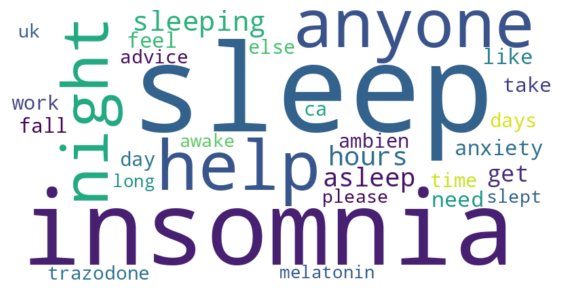

In [33]:
plt.figure(figsize=(7, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Next thing is to get all those tokens and use a GPT to extract the most common drug treatments mentioned.

In [34]:
tokens_df = pd.DataFrame({'token': all_tokens})

In [36]:
tokens_df.to_csv('all_posts.csv', index=False) #resulting file is too large so I need to split in 2

In [28]:
'''
def split_csv(input_file, output_file_prefix, num_parts):
    """Splits a CSV file into multiple parts.

    Args:
        input_file: Path to the input CSV file.
        output_file_prefix: Prefix for the output file names (e.g., 'part_').
        num_parts: The number of parts to split the file into.
    """

    df = pd.read_csv(input_file)
    num_rows = len(df)
    rows_per_part = num_rows // num_parts  # Integer division to get the number of rows per part

    for i in range(num_parts):
        start_row = i * rows_per_part
        end_row = (i + 1) * rows_per_part if i < num_parts - 1 else num_rows  # Handle the last part
        df_part = df.iloc[start_row:end_row]
        output_file = f"{output_file_prefix}{i + 1}.csv"
        df_part.to_csv(output_file, index=False)
        print(f"Part {i+1} saved to {output_file}")


# Example usage:
input_csv = 'all_comments.csv'  
output_prefix = 'part_'
number_of_parts = 2
split_csv(input_csv, output_prefix, number_of_parts)
'''

'\ndef split_csv(input_file, output_file_prefix, num_parts):\n    """Splits a CSV file into multiple parts.\n\n    Args:\n        input_file: Path to the input CSV file.\n        output_file_prefix: Prefix for the output file names (e.g., \'part_\').\n        num_parts: The number of parts to split the file into.\n    """\n\n    df = pd.read_csv(input_file)\n    num_rows = len(df)\n    rows_per_part = num_rows // num_parts  # Integer division to get the number of rows per part\n\n    for i in range(num_parts):\n        start_row = i * rows_per_part\n        end_row = (i + 1) * rows_per_part if i < num_parts - 1 else num_rows  # Handle the last part\n        df_part = df.iloc[start_row:end_row]\n        output_file = f"{output_file_prefix}{i + 1}.csv"\n        df_part.to_csv(output_file, index=False)\n        print(f"Part {i+1} saved to {output_file}")\n\n\n# Example usage:\ninput_csv = \'all_comments.csv\'  \noutput_prefix = \'part_\'\nnumber_of_parts = 2\nsplit_csv(input_csv, output_p

There are less drugs mentioned in the post section so I will continue to use the comprehensive list resulting from the comments notebook. 

In [51]:
drugs = [
    "Melatonin",
    "Zolpidem",
    "Ambien",
    "Trazodone",
    "Quetiapine",
    "Seroquel",
    "Eszopiclone",
    "Lunesta",
    "Alprazolam",
    "Xanax",
    "Lemborexant",
    "Dayvigo",
    "Lorazepam",
    "Ativan",
    "Doxepin",
    "Quviviq",
    "Daridorexant",
    "Gabapentin",
    "Temazepam",
    "Restoril",
    "Diazepam",
    "Valium",
    "Suvorexant",
    "Belsomra",
    "Diphenhydramine",
    "Clonidine",
    "Ramelteon",
    "Rozerem",
    "Zaleplon",
    "Sonata",
    "Pregabalin", "Mirtazapine", "Remeron", "Clonazepam", "Klonopin", "Hydroxyzine", "Vistaril","Neurontin"
]

Getting some attributes for visualization

In [37]:
df['day_of_week'] = df['date_0'].dt.day_name()
df['month'] = df['date_0'].dt.month_name()
df['year'] = df['date_0'].dt.year
df['hour'] = df['date_0'].dt.hour


In [38]:
df.head()

,author,author_created_utc,created_utc,id,is_self,name,num_comments,num_crossposts,permalink,retrieved_on,...,view_count,clicked,date_0,date,time,tokens,day_of_week,month,year,hour
0,OtherSquare7,1.587844e+09,2022-01-24 00:14:06,sb85l7,True,t3_sb85l7,7,0,/r/insomnia/comments/sb85l7/insomnia/,1654157455,...,NaN,NaN,2022-01-24 00:14:06,2022-01-24,00:14:06,[insomnia],Monday,January,2022,0
1,[deleted],NaN,2022-01-24 01:55:14,sba8y6,True,t3_sba8y6,20,0,/r/insomnia/comments/sba8y6/leaving_this_group...,1654157323,...,NaN,NaN,2022-01-24 01:55:14,2022-01-24,01:55:14,"[leaving, group, sleep, zoloft]",Monday,January,2022,1
2,[deleted],NaN,2022-01-24 02:19:39,sbaqny,True,t3_sbaqny,1,0,/r/insomnia/comments/sbaqny/should_i_take_stil...,1654157291,...,NaN,NaN,2022-01-24 02:19:39,2022-01-24,02:19:39,"[take, stilnox, night, first, day, new, job, t...",Monday,January,2022,2
3,[deleted],NaN,2022-01-24 02:21:45,sbasgw,True,t3_sbasgw,3,0,/r/insomnia/comments/sbasgw/should_i_take_stil...,1654157289,...,NaN,NaN,2022-01-24 02:21:45,2022-01-24,02:21:45,"[take, stilnox, night, new, job]",Monday,January,2022,2
4,wdDrake,1.620885e+09,2022-01-24 03:27:59,sbc3bn,True,t3_sbc3bn,17,0,/r/insomnia/comments/sbc3bn/trazodone_and_diph...,1654157209,...,NaN,NaN,2022-01-24 03:27:59,2022-01-24,03:27:59,"[trazodone, diphenhydramine]",Monday,January,2022,3


In [39]:
pivot = df.pivot_table(index='day_of_week', columns='hour', aggfunc='size', fill_value=0)

In [40]:
# Defining the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [41]:
# Convert the 'day_of_week' column to a categorical type with the specified order
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)

In [42]:
pivot = df.pivot_table(index='day_of_week', columns='hour', aggfunc='size', fill_value=0)

/tmp/ipykernel_564/3231555516.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='day_of_week', columns='hour', aggfunc='size', fill_value=0)


<Axes: title={'center': 'Density of Posts by Days of the Week and Hour of the Day'}, xlabel='hour', ylabel='day_of_week'>

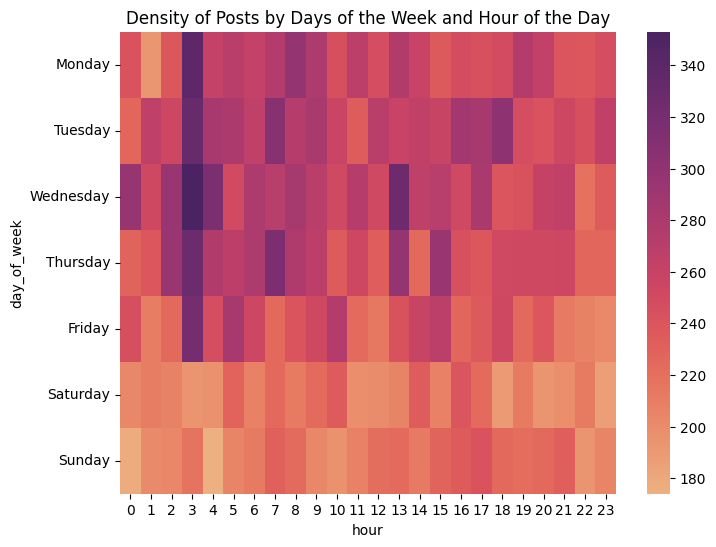

In [50]:
plt.figure(figsize=(8,6))
plt.title('Density of Posts by Days of the Week and Hour of the Day')
sns.heatmap(data=pivot, cmap='flare')

The heatmap indicates significant user activity between 2am and 4am with during the middle of the week. There is also a marked drop in posts during the weekend.

Another thing I was wondering is how often is each drug mentioned my month, are there any drugs that have been more talked about in the past 6 months? 18 months?
Let's check out what Copilot suggests?

In [52]:
# Initialize a dictionary to store the counts
drug_mentions = {drug: [] for drug in drugs}

# Group the dataframe by year and month
grouped = df.groupby(['year', 'month'])

# Iterate through each group and count the mentions of each drug
for (year, month), group in grouped:
    month_counts = Counter()
    for drug in drugs:
        month_counts[drug] = group['title'].str.contains(drug, case=False, na=False).sum()
    for drug in drugs:
        drug_mentions[drug].append((year, month, month_counts[drug]))

# Convert the dictionary to a DataFrame for easier visualization
drug_mentions_df = pd.DataFrame([(drug, year, month, count) for drug, mentions in drug_mentions.items() for year, month, count in mentions],
                                columns=['Drug', 'Year', 'Month', 'Count'])

# Display the DataFrame
drug_mentions_df.head()

,Drug,Year,Month,Count
0,Melatonin,2022,April,28
1,Melatonin,2022,August,17
2,Melatonin,2022,December,15
3,Melatonin,2022,February,20
4,Melatonin,2022,January,8


In [53]:
drug_mentions_df['date'] = pd.to_datetime(drug_mentions_df['Year'].astype(str) + ' ' + drug_mentions_df['Month'], format='%Y %B')

In [54]:
selected_drugs = drug_mentions_df[drug_mentions_df['Drug'].isin(['Ambien', 'Lunesta', 'Trazodone', 'Melatonin', 'Seroquel', 'Quviviq','Dayvigo', 'Belsomra'])]

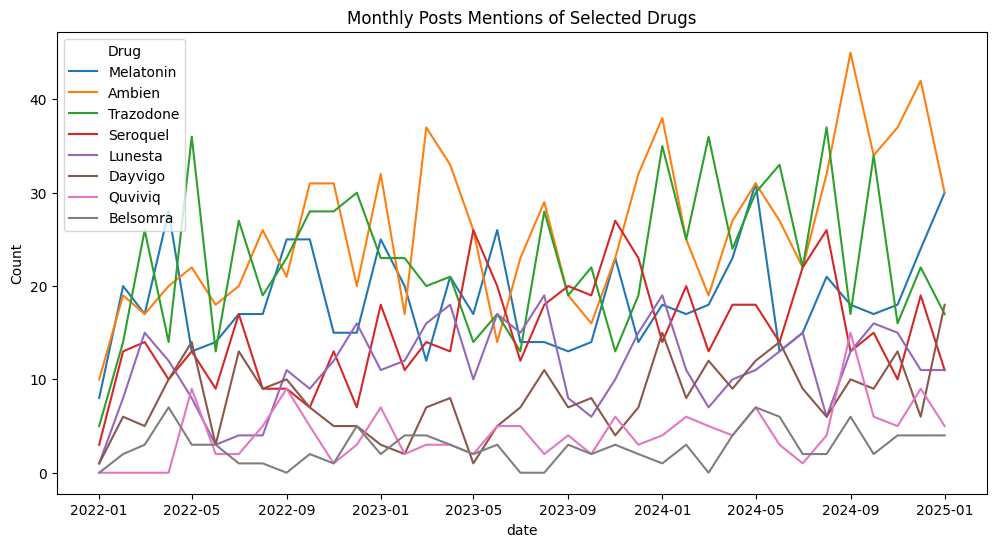

In [56]:
plt.figure(figsize=(12, 6))
plt.title('Monthly Posts Mentions of Selected Drugs')
sns.lineplot(data=selected_drugs, x='date', y='Count', hue='Drug')
plt.show()

Melatonin and Zolpidem (Ambien) mentions are consistently on top while the relatively newer therapies (Belsomra, Dayvigo, Quviviq) are less discussed despite being considered to have a better satefy profile than Zolpidem. Quviviq (Daridorexant) does show a positive trend which drives the collective mentions of DORAS up.

There also appears to be some type of pattern/seasonality for Ambien mentions or at least overal activity in the subreddit, maybe something to look into sometime in the future.